In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r"C:\Users\Admin\Downloads\Diabetes Dataset.csv")

In [3]:
data.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Gender,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4


In [4]:
df=data.copy()

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Diabetes_012,253680.0,0.296921,0.698160,0.0,0.0,0.0,0.0,2.0
HighBP,253680.0,0.429001,0.494934,0.0,0.0,0.0,1.0,1.0
HighChol,253680.0,0.424121,0.494210,0.0,0.0,0.0,1.0,1.0
CholCheck,253680.0,0.962670,0.189571,0.0,1.0,1.0,1.0,1.0
BMI,253680.0,28.382364,6.608694,12.0,24.0,27.0,31.0,98.0
Smoker,253680.0,0.443169,0.496761,0.0,0.0,0.0,1.0,1.0
Stroke,253680.0,0.040571,0.197294,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,253680.0,0.094186,0.292087,0.0,0.0,0.0,0.0,1.0
PhysActivity,253680.0,0.756544,0.429169,0.0,1.0,1.0,1.0,1.0
Fruits,253680.0,0.634256,0.481639,0.0,0.0,1.0,1.0,1.0


<Axes: >

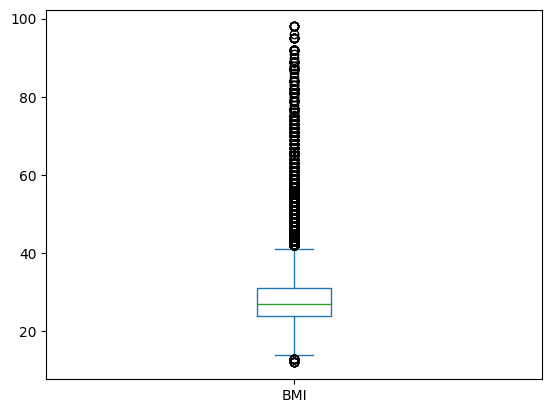

In [6]:
df["BMI"].plot.box()

<Axes: ylabel='Frequency'>

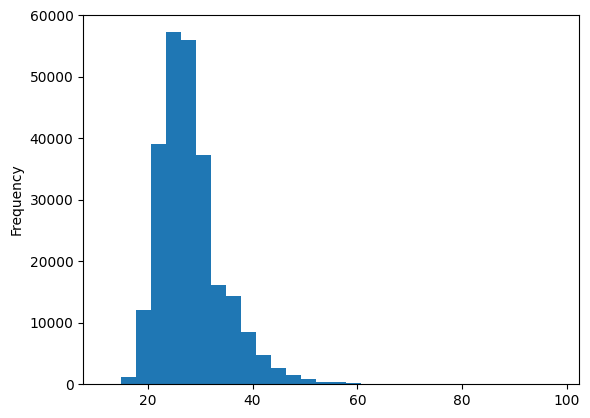

In [7]:
df["BMI"].plot.hist(bins=30)

In [8]:
pd.crosstab(df['Diabetes_012'],df['HighBP'])

HighBP,0,1
Diabetes_012,,
0,134391,79312
1,1718,2913
2,8742,26604


as per above observations the rate diabetes is 3 times higher with high bp than no bp

<Axes: xlabel='Diabetes_012'>

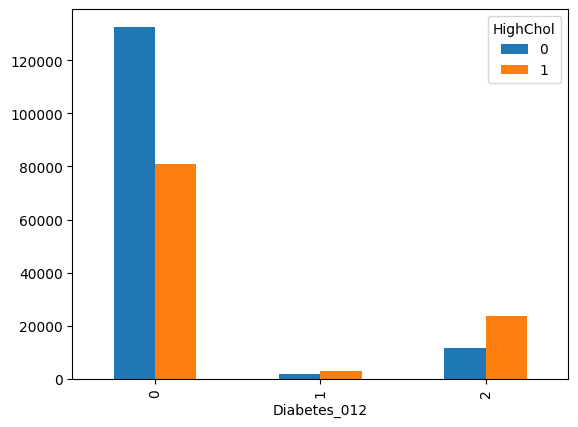

In [9]:
pd.crosstab(df['Diabetes_012'],df['HighChol']).plot.bar()

as per the above observations the chances of having diabetes is higher if one is having high cholestrol 

In [10]:
df['BMI'].quantile([0.8,0.99,0.995,0.997,0.999])

0.800    32.0
0.990    50.0
0.995    55.0
0.997    62.0
0.999    81.0
Name: BMI, dtype: float64

*** outliers = data < lower and data > upper ***

In [11]:
Q1 = df['BMI'].quantile(0.25)
Q3 = df['BMI'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - (1.5 * IQR)
upper = Q3 + (1.5 * IQR)


In [12]:
Q1,Q3,upper , lower ,IQR


(np.float64(24.0),
 np.float64(31.0),
 np.float64(41.5),
 np.float64(13.5),
 np.float64(7.0))

In [13]:
df[df['BMI']>upper]["Diabetes_012"].value_counts()

Diabetes_012
0    6165
2    3365
1     290
Name: count, dtype: int64

In [14]:
df[df['BMI']<lower]["Diabetes_012"].value_counts()

Diabetes_012
0    24
2     2
1     1
Name: count, dtype: int64

In [15]:
df.groupby("Diabetes_012")["BMI"].mean()

Diabetes_012
0    27.742521
1    30.724466
2    31.944011
Name: BMI, dtype: float64

In [16]:
df['Smoker'].value_counts()

Smoker
0    141257
1    112423
Name: count, dtype: int64

In [17]:
df['Diabetes_012'].value_counts()

Diabetes_012
0    213703
2     35346
1      4631
Name: count, dtype: int64

In [18]:
pd.crosstab(df['Diabetes_012'],df['Smoker'])

Smoker,0,1
Diabetes_012,,
0,121879,91824
1,2349,2282
2,17029,18317


THE NO. OF SMOKER WHO HAS DIABETES AND WHO DOESNT SMOKE IS NEARBY EQUAL

In [19]:
pd.crosstab(df['Diabetes_012'],df['Stroke'])

Stroke,0,1
Diabetes_012,,
0,206944,6759
1,4366,265
2,32078,3268


THOSE WHO DONT HAVE STROKE HAVE MORE DIABETES AND THE RATIO IS APPROX. 10:1

In [20]:
pd.crosstab(df['Diabetes_012'],df['HvyAlcoholConsump'])

HvyAlcoholConsump,0,1
Diabetes_012,,
0,200487,13216
1,4423,208
2,34514,832


THE PEOPLE WHO CONSUME HEAVY ALCHOHOL HAVE LESS CHANCES OF DIABETES

In [21]:
pd.crosstab(df['Diabetes_012'],df['PhysActivity'])

PhysActivity,0,1
Diabetes_012,,
0,47212,166491
1,1489,3142
2,13059,22287


In [22]:
df['BMI'].sample(29).tolist()

[29,
 24,
 22,
 24,
 29,
 27,
 22,
 28,
 27,
 29,
 23,
 26,
 22,
 21,
 22,
 28,
 22,
 25,
 29,
 24,
 33,
 43,
 28,
 29,
 35,
 48,
 40,
 40,
 19]

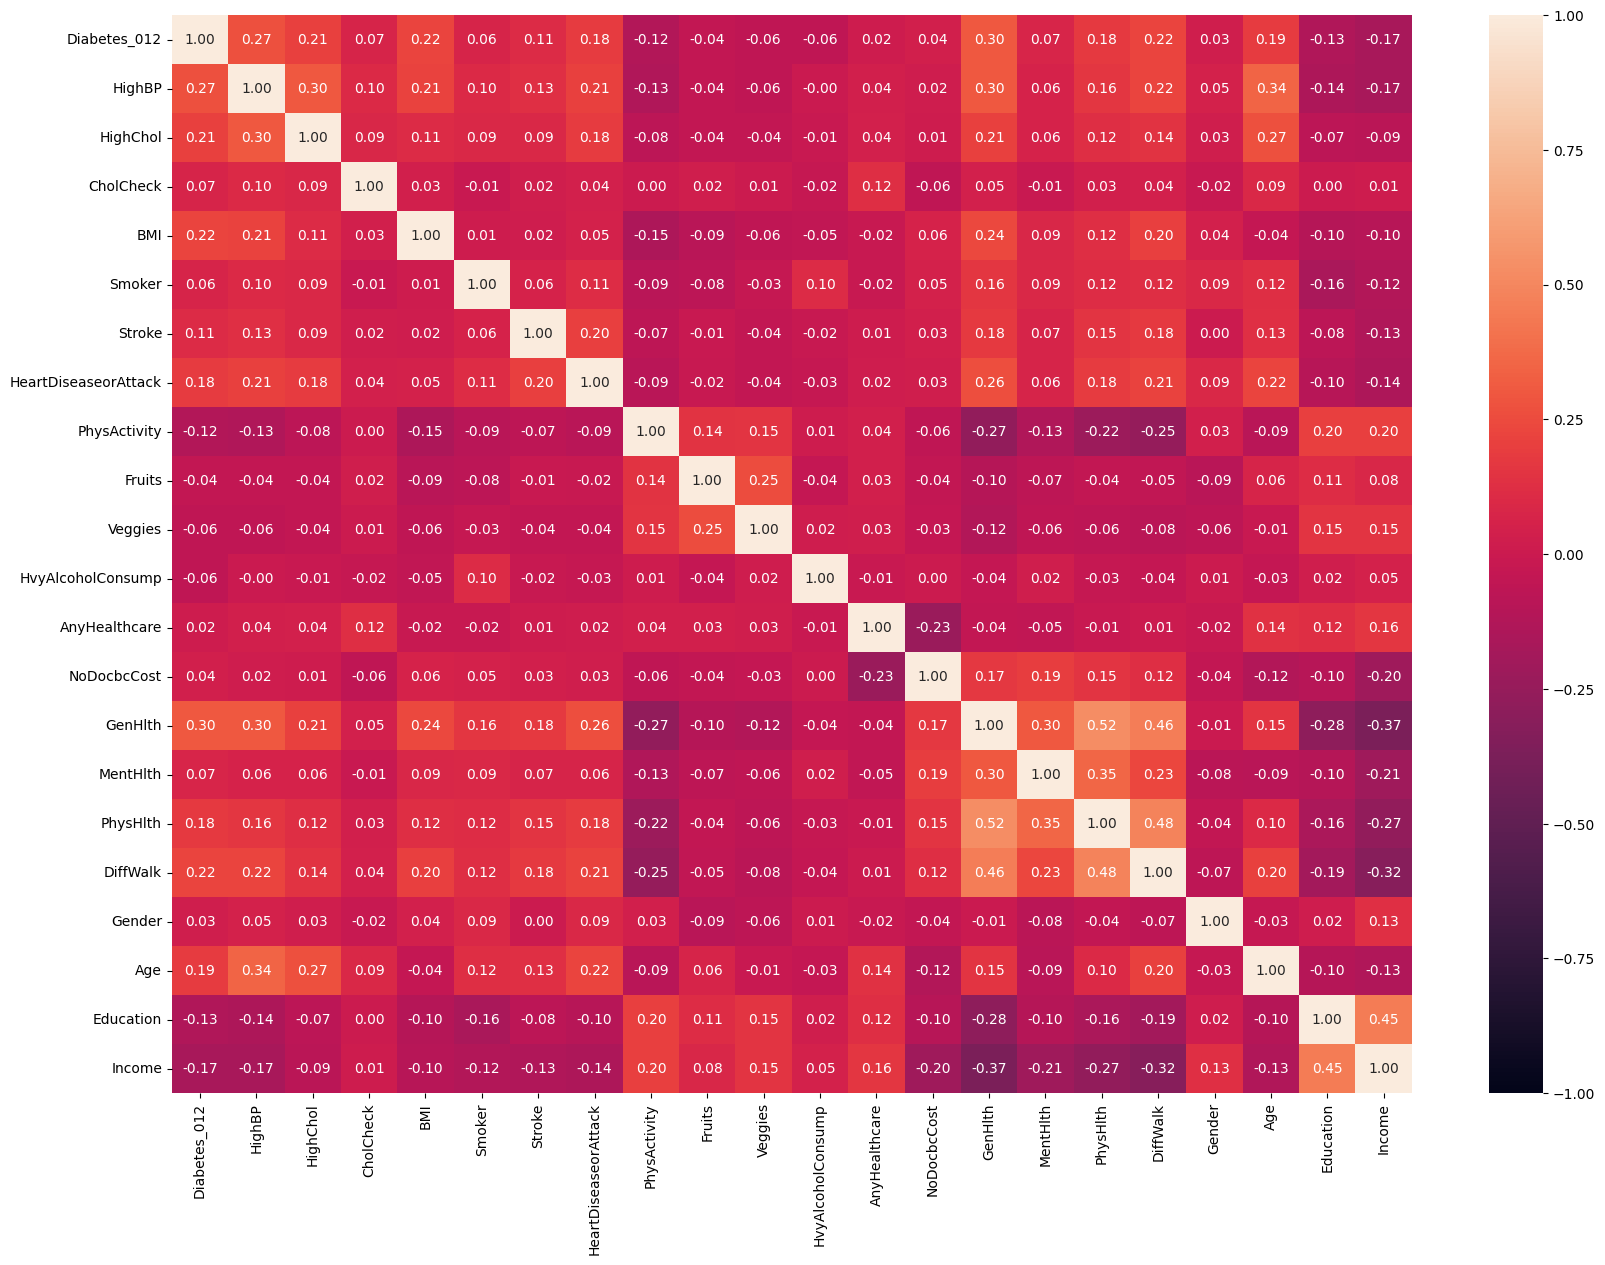

In [23]:
plt.figure(figsize=(20,14))
sns.heatmap(df.corr(),annot=True, vmin=-1 , vmax=1, fmt='.2F')
plt.show()

In [24]:
df.corr().iloc[0].sort_values()

Income                 -0.171483
Education              -0.130517
PhysActivity           -0.121947
Veggies                -0.058972
HvyAlcoholConsump      -0.057882
Fruits                 -0.042192
AnyHealthcare           0.015410
Gender                  0.031040
NoDocbcCost             0.035436
Smoker                  0.062914
CholCheck               0.067546
MentHlth                0.073507
Stroke                  0.107179
PhysHlth                0.176287
HeartDiseaseorAttack    0.180272
Age                     0.185026
HighChol                0.209085
DiffWalk                0.224239
BMI                     0.224379
HighBP                  0.271596
GenHlth                 0.302587
Diabetes_012            1.000000
Name: Diabetes_012, dtype: float64

In [25]:
corr = df.corr()

In [26]:
corr.query('Diabetes_012 > -0.09 | Diabetes_012 > 0.09')['Diabetes_012']

Diabetes_012            1.000000
HighBP                  0.271596
HighChol                0.209085
CholCheck               0.067546
BMI                     0.224379
Smoker                  0.062914
Stroke                  0.107179
HeartDiseaseorAttack    0.180272
Fruits                 -0.042192
Veggies                -0.058972
HvyAlcoholConsump      -0.057882
AnyHealthcare           0.015410
NoDocbcCost             0.035436
GenHlth                 0.302587
MentHlth                0.073507
PhysHlth                0.176287
DiffWalk                0.224239
Gender                  0.031040
Age                     0.185026
Name: Diabetes_012, dtype: float64

In [27]:
pd.crosstab(df['Diabetes_012'],df['Income'])

Income,1,2,3,4,5,6,7,8
Diabetes_012,,,,,,,,
0,7114,8341,12005,15622,20792,30431,37219,82179
1,314,356,421,459,587,748,735,1011
2,2383,3086,3568,4054,4504,5291,5265,7195


In [28]:
pd.crosstab(df['Diabetes_012'],df['Education'])

Education,1,2,3,4,5,6
Diabetes_012,,,,,,
0,125,2699,6868,50334,58223,95454
1,2,161,314,1350,1333,1471
2,47,1183,2296,11066,10354,10400


In [ ]:
pd.crosstab(df['PhysHlth'],df['PhysActivity'])